# Praca domowa 2 - MIOWAD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from NeuralNetwork.NeuralNetwork import Net, mse
from NeuralNetwork.Layers import DenseNetLayer
from NeuralNetwork.ActivationFunctions import SigmoidFunction, LinearFunction
from NeuralNetwork.Initializers import RandomNormalInitializer
from NeuralNetwork.Optimizers import SGD

In [3]:
df = pd.read_csv("./data/regression/square-simple-training.csv", index_col=0)
df.head()

,x,y
1,-0.171543,-127.351580
2,0.025201,-129.942844
3,-1.368991,38.672367
4,1.907390,197.432191
5,0.011129,-129.988852


In [4]:
X = df.x.to_numpy()
X = np.transpose(np.array([X]))
Y = df.y.to_numpy()
Y = np.transpose(np.array([Y]))

In [5]:
df1 = pd.read_csv("./data/regression/square-simple-test.csv", index_col=0)
df1.head()

,x,y
1,-0.980437,-43.486918
2,-1.219074,3.752808
3,0.124243,-128.610721
4,1.227789,5.671828
5,1.067348,-27.469169


In [6]:
X1 = df1.x.to_numpy()
X1 = np.transpose(np.array([X1]))
Y1 = df1.y.to_numpy()
Y1 = np.transpose(np.array([Y1]))

## Zbiór square-simple

In [7]:
np.random.seed(0)

In [8]:
n = Net(optimizer = SGD(learning_rate=0.0001))
n.add_layer(DenseNetLayer(1, 5, SigmoidFunction(), RandomNormalInitializer()))
n.add_layer(DenseNetLayer(5, 5, SigmoidFunction(), RandomNormalInitializer()))
n.add_layer(DenseNetLayer(5, 1, LinearFunction(), RandomNormalInitializer()))
n.train(X, Y, X1, Y1, n_epochs=2500, eval_frequency=100)

Epoch: 0, mse train: 9873.515301896203, mse eval: 8400.40736004786
Epoch: 100, mse train: 260.2762329760073, mse eval: 236.24516921946702
Epoch: 200, mse train: 44.53096570817196, mse eval: 50.71178553774319
Epoch: 300, mse train: 14.294268149266212, mse eval: 21.698171893480136
Epoch: 400, mse train: 8.066770036175242, mse eval: 14.353303007898893
Epoch: 500, mse train: 6.45216306918566, mse eval: 11.770340818192892
Epoch: 600, mse train: 5.586475288015021, mse eval: 10.294990691913753
Epoch: 700, mse train: 4.99715841648662, mse eval: 9.263423900136825
Epoch: 800, mse train: 4.609427768025371, mse eval: 8.510110553249634
Epoch: 900, mse train: 4.362296054314799, mse eval: 7.939157198036844
Epoch: 1000, mse train: 4.194530858175921, mse eval: 7.478959288327855
Epoch: 1100, mse train: 4.055098159029548, mse eval: 7.077591263334089
Epoch: 1200, mse train: 3.9111092507040586, mse eval: 6.70311341026872
Epoch: 1300, mse train: 3.74820848179139, mse eval: 6.340542161684382
Epoch: 1400, mse

### Wizualizacja zbioru testowego i predykcji na zbiorze testowym

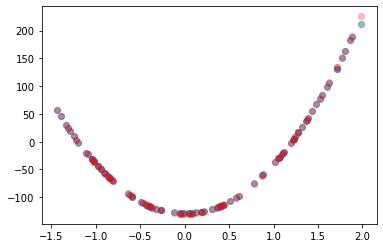

In [9]:
plt.scatter(X1, n.forward(X1), alpha = 0.5)
plt.scatter(X1, Y1, color='red', alpha = 0.25)
plt.show()

In [10]:
print(f"MSE na zbiorze testowym wynosi: {mse(Y1, n.forward(X1))}")

MSE na zbiorze testowym wynosi: 3.0635556792758267
